## Bayesian Classification

Klasifikasi Naif Bayes dibangun berdasarkan metode klasifikasi Bayesian. Metode ini mengandalkan teorema Bayes, yaitu persamaan yang menjelaskan hubungan probabilitas bersyarat dari kuantitas statistik.

Di sinilah "naif" dalam "Bayes naif" berperan: jika kita membuat asumsi yang sangat naif tentang model generatif untuk setiap label, kita dapat menemukan perkiraan kasar dari model generatif untuk setiap kelas, lalu melanjutkan dengan klasifikasi Bayesian. Berbagai jenis pengklasifikasi Bayes naif didasarkan pada asumsi naif yang berbeda tentang data, dan kita akan membahas beberapa di antaranya di bagian berikut.

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

## GAHSSION NAIVE BAYES
Model Gaussian yang paling sederhana adalah dengan mengasumsikan bahwa data digambarkan oleh distribusi Gaussian tanpa kovarian antar dimensi. Model ini dapat disesuaikan dengan menghitung mean dan deviasi standar titik-titik dalam setiap label, yang merupakan semua yang kita perlukan untuk menentukan distribusi tersebut. Hasil asumsi Gaussian yang naif ini ditunjukkan pada gambar berikut:

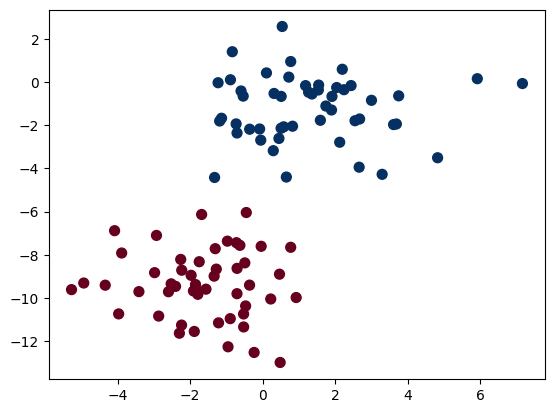

In [5]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [10]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

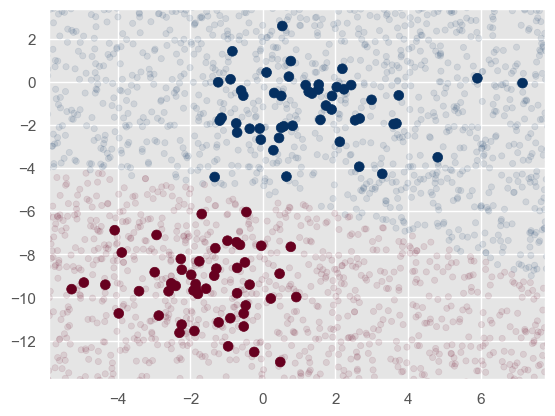

In [11]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Kita melihat batas yang sedikit melengkung dalam klasifikasi—secara umum, batas yang dihasilkan oleh model Bayes naif Gaussian akan berbentuk kuadratik.

Aspek bagus dari formalisme Bayesian ini adalah bahwa hal itu secara alami memungkinkan klasifikasi probabilistik, yang dapat kita hitung menggunakan metode predict_proba:

In [12]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

Kolom-kolom tersebut masing-masing memberikan probabilitas posterior dari label pertama dan kedua. Jika Anda mencari estimasi ketidakpastian dalam klasifikasi Anda, pendekatan Bayesian seperti ini dapat menjadi tempat yang baik untuk memulai.

Tentu saja, klasifikasi akhir hanya akan sebaik asumsi model yang mengarah padanya, itulah sebabnya Gaussian naive Bayes sering kali tidak menghasilkan hasil yang sangat baik. Namun, dalam banyak kasus—terutama karena jumlah fitur menjadi besar—asumsi ini tidak cukup merugikan untuk mencegah Gaussian naive Bayes menjadi metode yang andal.

----

## Multinomial Naive Bayes

Asumsi Gaussian yang baru saja dijelaskan bukanlah satu-satunya asumsi sederhana yang dapat digunakan untuk menentukan distribusi generatif untuk setiap label.
Contoh lain yang berguna adalah multinomial naive Bayes, di mana fitur diasumsikan dihasilkan dari distribusi multinomial sederhana.
Distribusi multinomial menggambarkan probabilitas pengamatan hitungan di antara sejumlah kategori, dan dengan demikian multinomial naive Bayes paling sesuai untuk fitur yang mewakili hitungan atau rasio hitungan.

Idenya persis sama seperti sebelumnya, kecuali bahwa alih-alih memodelkan distribusi data dengan Gaussian yang paling sesuai, kami memodelkannya dengan distribusi multinomial yang paling sesuai.

In [13]:
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

Untuk menyederhanakannya, di sini kami akan memilih beberapa kategori saja dan mengunduh set pelatihan dan pengujian:

In [14]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Berikut ini adalah entri representatif dari data:

In [15]:
print(train.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



Untuk menggunakan data ini untuk pembelajaran mesin, kita perlu mampu mengonversi konten setiap string menjadi vektor angka. Untuk ini, kita akan menggunakan vektorizer TF-IDF (diperkenalkan dalam Feature Engineering), dan membuat alur kerja yang melampirkannya ke pengklasifikasi Bayes naif multinomial:

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Dengan alur kerja ini, kita dapat menerapkan model ke data pelatihan dan memprediksi label untuk data uji:

In [18]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

Sekarang kita telah memperkirakan label untuk data pengujian, kita dapat mengevaluasinya untuk mempelajari kinerja estimator. Misalnya, mari kita lihat matriks konfusi antara label benar dan label prediksi untuk data pengujian (lihat gambar berikut):

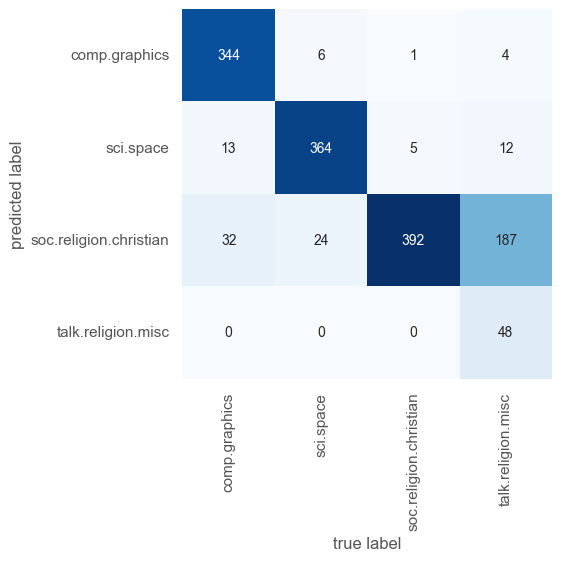

In [19]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names,
            cmap='Blues')
plt.xlabel('true label')
plt.ylabel('predicted label');

Terbukti, bahkan pengklasifikasi yang sangat sederhana ini berhasil memisahkan diskusi ruang angkasa dari diskusi komputer, namun hal ini menjadi membingungkan antara diskusi tentang agama dan diskusi tentang agama Kristen. Ini mungkin yang diharapkan!

Yang keren di sini adalah kita sekarang memiliki alat untuk menentukan kategori string apa pun, menggunakan metode prediksi pipeline ini. Berikut fungsi utilitas yang akan mengembalikan prediksi untuk satu string:

In [20]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

Lets Try

In [21]:
predict_category('sending a payload to the ISS')

'sci.space'

In [22]:
predict_category('discussing the existence of God')

'soc.religion.christian'

In [23]:
predict_category('determining the screen resolution')

'comp.graphics'

Ingatlah bahwa ini tidak lebih canggih dari model probabilitas sederhana untuk frekuensi (tertimbang) setiap kata dalam string; namun, hasilnya sungguh menakjubkan. Bahkan algoritme yang sangat naif, bila digunakan dengan hati-hati dan dilatih pada sekumpulan besar data berdimensi tinggi, bisa menjadi sangat efektif.